In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
import numpy as np 
import pandas as pd
import seaborn as sn

In [2]:
sc= SparkContext().getOrCreate()
sqlContext = SQLContext(sc)

In [109]:
house_df = sqlContext.read.option("header", "true").option("inferSchema", "true").csv("datasets/BostonHousing.csv")
house_df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [110]:
house_df.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [111]:
plot_data=features.toPandas()

AttributeError: 'list' object has no attribute 'toPandas'

<AxesSubplot:xlabel='nox', ylabel='lstat'>

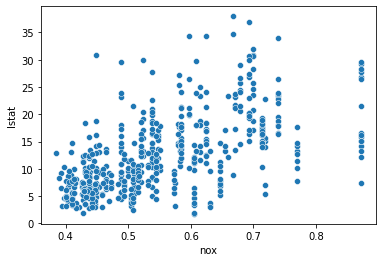

In [112]:
sn.scatterplot(x=plot_data['nox'],y=plot_data["lstat"])

In [113]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [115]:
vector_assembler=VectorAssembler(inputCols=["crim","nox","dis","lstat"],outputCol = 'features')
data=vector_assembler.transform(house_df)
data.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,0.538,4....|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.469,4....|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.469,4....|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.458,6....|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.458,6....|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|[0.02985,0.458,6....|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5

In [117]:
features=data.select("features","medv")
features=features.randomSplit([0.7,0.3])
train_df=features[0]
test_df=features[1]

In [119]:
model=LinearRegression(featuresCol="features",labelCol="medv",maxIter=100)
model_fit=model.fit(train_df)

In [120]:
preds=model_fit.transform(test_df)

In [122]:
from pyspark.ml.evaluation import RegressionEvaluator

In [123]:
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="medv",metricName="r2")

In [124]:
lr_evaluator.evaluate(preds)

0.5925609020164043